In [17]:
import pandas as pd
import numpy as np

# 1. Series

One column or one row of a dataframe

In [18]:
list = [1,2,3]

In [19]:
list[0]

1

In [20]:
list[1]

2

In [21]:
indicies = ['a','b','c']
data = [10,20,30]
s1 = pd.Series(data,indicies) #ind1 = data, ind2 = indicies

In [22]:
s1

a    10
b    20
c    30
dtype: int64

In [23]:
s1['a']

10

In [24]:
s1['b']

20

In [25]:
s1['c']

30

In [26]:
s2 = pd.Series({'a':10,'b':20,'c':30})
s2

a    10
b    20
c    30
dtype: int64

In [27]:
s2['b'] # access elements in a series

20

In [28]:
s2['a'] = 10**3 # modify elements in a series

In [29]:
s2

a    1000
b      20
c      30
dtype: int64

In [30]:
s1 + s2 # values sitting at the same indicies will be added together

a    1010
b      40
c      60
dtype: int64

In [31]:
s3 = pd.Series({'a':50,'d':70})

In [32]:
s1

a    10
b    20
c    30
dtype: int64

In [33]:
s3

a    50
d    70
dtype: int64

In [34]:
s1 + s3 # if there is no common index, the output is not a num NAN

a    60.0
b     NaN
c     NaN
d     NaN
dtype: float64

In [35]:
s1*s2

a    10000
b      400
c      900
dtype: int64

In [36]:
s1/s2

a    0.01
b    1.00
c    1.00
dtype: float64

In [37]:
s1.sum()

60

In [38]:
s1.product()

6000

# 2. DataFrames
2d, size-mutable, and potentially hetergeneous tabular data structures with label axes (rows and columns).
Dictionary-like data containers for series objects -- a concatenation of series.
Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

In [39]:
df = pd.DataFrame(np.random.rand(3,5), ['A','B','C'],['price','volume','return rate', 'open price', 'close price'])

In [40]:
df

,price,volume,return rate,open price,close price
A,0.470485,0.149234,0.605779,0.745436,0.047342
B,0.986785,0.273946,0.891267,0.435829,0.218525
C,0.609084,0.398334,0.896389,0.966172,0.427796


In [41]:
df['price'] # indexing columns

A    0.470485
B    0.986785
C    0.609084
Name: price, dtype: float64

In [42]:
type(df['price']) # columns are series

pandas.core.series.Series

In [43]:
df.loc['A'] # indexing rows, .loc = .location

price          0.470485
volume         0.149234
return rate    0.605779
open price     0.745436
close price    0.047342
Name: A, dtype: float64

In [44]:
type(df.loc['A']) # rows are series

pandas.core.series.Series

In [45]:
df['volume']['C'] # extract specific value [column][row]

0.3983339692392214

In [46]:
df.loc['C'].loc['volume'] # extract specific value [row][column]

0.3983339692392214

In [47]:
# Multi-index object
out = ['LEB','LEB','LEB','FR','FR','FR','USA','USA','USA']
inside = ['MORNING','MIDDAY', 'EVENING','MORNING','MIDDAY', 'EVENING','MORNING','MIDDAY', 'EVENING'] # indicies
indexRows = zip(out,inside) # tuple
indexRows = pd.MultiIndex.from_tuples(indexRows)
df2 = pd.DataFrame(np.random.rand(9,3),indexRows, ['price','close','open'])
df2 # multi-indexing on the rows

price     close      open
LEB MORNING  0.084602  0.626138  0.668473
    MIDDAY   0.323332  0.430004  0.009845
    EVENING  0.223616  0.212477  0.336437
FR  MORNING  0.128454  0.954572  0.876847
    MIDDAY   0.806339  0.677076  0.215818
    EVENING  0.868420  0.234923  0.504191
USA MORNING  0.062054  0.513986  0.988394
    MIDDAY   0.726677  0.606035  0.204542
    EVENING  0.574799  0.372865  0.496390

In [48]:
df2.loc['LEB'].loc['EVENING'].loc['close'] # row_out, then row_in, then column

0.21247653609726724

In [49]:
# Multi-index object
out_most = ['ASIA','ASIA','ASIA','EUROPE','EUROPE','EUROPE','NORTH AMERICA','NORTH AMERICA','NORTH AMERICA']
out = ['LEB','CHINA','JAPAN','FRANCE','ITALY','NORWAY','USA','CANADA','MEXICO']
inside = ['MORNING','MIDDAY', 'EVENING','MORNING','MIDDAY', 'EVENING','MORNING','MIDDAY', 'EVENING'] # indicies
indexRows = zip(out_most,out,inside) # tuple
indexRows = pd.MultiIndex.from_tuples(indexRows)
df3 = pd.DataFrame(np.random.rand(9,3),indexRows, ['price','close','open'])
df3 # multi-indexing on the rows

price     close      open
ASIA          LEB    MORNING  0.076358  0.792893  0.511365
              CHINA  MIDDAY   0.906647  0.658108  0.239507
              JAPAN  EVENING  0.462375  0.884499  0.126588
EUROPE        FRANCE MORNING  0.267984  0.568195  0.344604
              ITALY  MIDDAY   0.909170  0.614150  0.113333
              NORWAY EVENING  0.933275  0.967171  0.003138
NORTH AMERICA USA    MORNING  0.078804  0.842959  0.828342
              CANADA MIDDAY   0.183781  0.235949  0.481581
              MEXICO EVENING  0.011524  0.650209  0.536872

# 3. Operations on DataFrames

## 3.1 Boolean or Logical Operations

In [50]:
df

,price,volume,return rate,open price,close price
A,0.470485,0.149234,0.605779,0.745436,0.047342
B,0.986785,0.273946,0.891267,0.435829,0.218525
C,0.609084,0.398334,0.896389,0.966172,0.427796


In [51]:
df > 0.5

,price,volume,return rate,open price,close price
A,False,False,True,True,False
B,True,False,True,False,False
C,True,False,True,True,False


In [52]:
df[df>0.5]

,price,volume,return rate,open price,close price
A,NaN,NaN,0.605779,0.745436,NaN
B,0.986785,NaN,0.891267,NaN,NaN
C,0.609084,NaN,0.896389,0.966172,NaN


In [53]:
df

,price,volume,return rate,open price,close price
A,0.470485,0.149234,0.605779,0.745436,0.047342
B,0.986785,0.273946,0.891267,0.435829,0.218525
C,0.609084,0.398334,0.896389,0.966172,0.427796


In [54]:
(df < 0.3) | (df > 0.9)

,price,volume,return rate,open price,close price
A,False,True,False,False,True
B,True,True,False,False,True
C,False,False,False,True,False


In [55]:
(df > 0.3) & (df < 0.9)

,price,volume,return rate,open price,close price
A,True,False,True,True,False
B,False,False,True,True,False
C,True,True,True,False,True


In [56]:
df[(df > 0.3) & (df < 0.9)]

,price,volume,return rate,open price,close price
A,0.470485,NaN,0.605779,0.745436,NaN
B,NaN,NaN,0.891267,0.435829,NaN
C,0.609084,0.398334,0.896389,NaN,0.427796


## 3.2 Grouping Elements (Aggregate Functions)

In [57]:
dictionary =  {'Country':['LEB','LEB','LEB','FR','FR','UY','UY','NIG','NIG'],
                'Stock Price':[31,321,15,12,12,59,130,320,90],
                 'Sales':[3112,321221,12321,12121,122,539,13120,3520,490]}# recall each element in the dictionary is stacked in each column of the dataframe
df = pd.DataFrame(dictionary) # numbered is the default index name
df

,Country,Stock Price,Sales
0,LEB,31,3112
1,LEB,321,321221
2,LEB,15,12321
3,FR,12,12121
4,FR,12,122
5,UY,59,539
6,UY,130,13120
7,NIG,320,3520
8,NIG,90,490


In [58]:
df.describe() # pandas is smart enough to not compute these metrics on the Country column of strings

,Stock Price,Sales
count,9.000000,9.000000
mean,110.000000,40729.555556
std,125.745775,105324.700991
min,12.000000,122.000000
25%,15.000000,539.000000
50%,59.000000,3520.000000
75%,130.000000,12321.000000
max,321.000000,321221.000000


In [59]:
df.describe().loc['min'].loc['Sales']

122.0

In [60]:
df.groupby('Country').describe().T

Country                      FR            LEB          NIG            UY
Stock Price count      2.000000       3.000000     2.000000      2.000000
            mean      12.000000     122.333333   205.000000     94.500000
            std        0.000000     172.236272   162.634560     50.204581
            min       12.000000      15.000000    90.000000     59.000000
            25%       12.000000      23.000000   147.500000     76.750000
            50%       12.000000      31.000000   205.000000     94.500000
            75%       12.000000     176.000000   262.500000    112.250000
            max       12.000000     321.000000   320.000000    130.000000
Sales       count      2.000000       3.000000     2.000000      2.000000
            mean    6121.500000  112218.000000  2005.000000   6829.500000
            std     8484.574267  181060.464837  2142.533547   8896.110414
            min      122.000000    3112.000000   490.000000    539.000000
            25%     3121.750000    7716.500000  1247.500000   3684.250000
            50%     6121.500000   12321.000000  2005.000000   6829.500000
            75%     9121.250000  166771.000000  2762.500000   9974.750000
            max    12121.000000  321221.000000  3520.000000  13120.000000

In [61]:
df.groupby('Country').mean()

,Stock Price,Sales
Country,,
FR,12.000000,6121.5
LEB,122.333333,112218.0
NIG,205.000000,2005.0
UY,94.500000,6829.5


In [62]:
df.groupby('Country').std()

,Stock Price,Sales
Country,,
FR,0.000000,8484.574267
LEB,172.236272,181060.464837
NIG,162.634560,2142.533547
UY,50.204581,8896.110414


In [63]:
df.groupby('Country').min()

,Stock Price,Sales
Country,,
FR,12,122
LEB,15,3112
NIG,90,490
UY,59,539


In [64]:
df.groupby('Country').max()

,Stock Price,Sales
Country,,
FR,12,12121
LEB,321,321221
NIG,320,3520
UY,130,13120


In [65]:
df

,Country,Stock Price,Sales
0,LEB,31,3112
1,LEB,321,321221
2,LEB,15,12321
3,FR,12,12121
4,FR,12,122
5,UY,59,539
6,UY,130,13120
7,NIG,320,3520
8,NIG,90,490


## 3.3 Concatenation

In [66]:
DF1 = pd.DataFrame({'A':[1,2,3,4],
                    'B':[10,20,30,40],
                    'C':[100,200,300,400]})
DF2 = pd.DataFrame({'A':[5,6,7,8],
                    'B':[50,60,70,80],
                    'C':[500,600,700,800]})
DF3 = pd.DataFrame({'A':[9,10,11,12],
                    'B':[90,100,110,120],
                    'C':[900,1000,1100,1200]})

In [67]:
DF1

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [68]:
DF2

,A,B,C
0,5,50,500
1,6,60,600
2,7,70,700
3,8,80,800


In [69]:
DF3

,A,B,C
0,9,90,900
1,10,100,1000
2,11,110,1100
3,12,120,1200


In [70]:
DF = pd.concat([DF1,DF2,DF3],axis=1) # Concat next to each other, axis=0 for stacking on top of one another
DF

,A,B,C,A,B,C,A,B,C
0,1,10,100,5,50,500,9,90,900
1,2,20,200,6,60,600,10,100,1000
2,3,30,300,7,70,700,11,110,1100
3,4,40,400,8,80,800,12,120,1200


## 3.4 Merging

In [71]:
D1 = pd.DataFrame({'A':[1,2,3,4],
                    'B':[10,20,30,40],
                    'C':[100,200,300,400]})
D2 = pd.DataFrame({'C':[100,200,300,400],
                    'D':[10,20,30,40],
                    'E':[100,200,300,400]})

In [72]:
pd.merge(D1,D2)

,A,B,C,D,E
0,1,10,100,10,100
1,2,20,200,20,200
2,3,30,300,30,300
3,4,40,400,40,400


In [73]:
pd.concat([D1,D2],axis=1) # Notice how C is redundant

,A,B,C,C,D,E
0,1,10,100,100,10,100
1,2,20,200,200,20,200
2,3,30,300,300,30,300
3,4,40,400,400,40,400


In [74]:
DF1

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [75]:
DF2

,A,B,C
0,5,50,500
1,6,60,600
2,7,70,700
3,8,80,800


In [76]:
pd.merge(DF1,DF2) # Empty because there are common columns shared across dataframes

,A,B,C


## 3.5 Unique Values

In [77]:
DF = pd.DataFrame({'1':[10,20,30,40],
                   '2':[31,23523,423423,31],
                   '3':['asd','qwe','zxc','qwe']})
DF

,1,2,3
0,10,31,asd
1,20,23523,qwe
2,30,423423,zxc
3,40,31,qwe


In [78]:
 DF['2'].unique()[0]

31

In [79]:
DF['2'].nunique() # num of unique elements

3

In [80]:
DF['2'].value_counts() # series

2
31        2
23523     1
423423    1
Name: count, dtype: int64

## 3.6 Functions

In [81]:
def multiplyByThree(x):
    return x*3

In [82]:
DF

,1,2,3
0,10,31,asd
1,20,23523,qwe
2,30,423423,zxc
3,40,31,qwe


In [83]:
multiplyByThree(DF['3'])

0    asdasdasd
1    qweqweqwe
2    zxczxczxc
3    qweqweqwe
Name: 3, dtype: object

In [84]:
DF.apply(multiplyByThree) # equals multiplyByThree(DF)

,1,2,3
0,30,93,asdasdasd
1,60,70569,qweqweqwe
2,90,1270269,zxczxczxc
3,120,93,qweqweqwe


In [85]:
DF['1'].apply(lambda x:x**2+1)

0     101
1     401
2     901
3    1601
Name: 1, dtype: int64

## 3.7 Removing Rows/Columns

In [86]:
DF

,1,2,3
0,10,31,asd
1,20,23523,qwe
2,30,423423,zxc
3,40,31,qwe


In [87]:
DF.drop(2) # Remove rows

,1,2,3
0,10,31,asd
1,20,23523,qwe
3,40,31,qwe


In [88]:
DF = pd.DataFrame({'1':[10,20,30,40],
                   '2':[31,23523,423423,31],
                   '3':['asd','qwe','zxc','qwe']})

In [89]:
DF

,1,2,3
0,10,31,asd
1,20,23523,qwe
2,30,423423,zxc
3,40,31,qwe


In [90]:
DF.drop('2',axis=1,inplace=True) # Remove columns and making the effect take the with inplace

In [91]:
DF

,1,3
0,10,asd
1,20,qwe
2,30,zxc
3,40,qwe


# 4. Data/File IO

## 4.1) CSV (Comma Separated Files)


In [92]:
df = pd.read_csv('./vgsales.csv')

In [93]:
df2 = df # after processing

In [94]:
df2.to_csv('./vgsalesOUTPUT.csv')

## 4.2) Excel (Spreadsheets)

In [95]:
# df.pd.read_excel('')

In [96]:
# df2.to_excel('./newexcel_file')

## 4.3) HTML (over the web)

In [97]:
html = pd.read_html('https://scholar.google.com/citations?user=CoADxCwAAAAJ&hl=en&oi=sra',encoding='latin-1')

/Users/matthewyacovone/python-portfolio/env/lib/python3.10/site-packages/bs4/__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [98]:
html

[  Unnamed: 0    All  Since 2019
 0  Citations  12590        6164
 1    h-index     43          33
 2  i10-index     54          49,
    TitleSortSort by citationsSort by yearSort by title  Cited byCited by  Year
 0   The classical complement cascade mediates CNS ...               3356  2007
 1   Gabapentin receptor α2δ-1 is a neuronal thromb...                991  2009
 2   Mechanisms underlying development of visual ma...                694  2008
 3   Finger-length ratios and sexual orientationTJ ...                670  2000
 4   Genetic identification of an On-Off direction-...                421  2009
 5   What can mice tell us about how vision works?A...                413  2011
 6   Diverse visual features encoded in mouse later...                385  2013
 7   A dedicated circuit links direction-selective ...                357  2014
 8   Architecture, function, and assembly of the mo...                323  2017
 9   Architecture and activity-mediated refinement ...             

In [99]:
type(html)

list

In [100]:
len(html) # Contains two tables

2

In [101]:
html[1] 

,TitleSortSort by citationsSort by yearSort by title,Cited byCited by,Year
0,The classical complement cascade mediates CNS ...,3356,2007
1,Gabapentin receptor α2δ-1 is a neuronal thromb...,991,2009
2,Mechanisms underlying development of visual ma...,694,2008
3,Finger-length ratios and sexual orientationTJ ...,670,2000
4,Genetic identification of an On-Off direction-...,421,2009
5,What can mice tell us about how vision works?A...,413,2011
6,Diverse visual features encoded in mouse later...,385,2013
7,A dedicated circuit links direction-selective ...,357,2014
8,"Architecture, function, and assembly of the mo...",323,2017
9,Architecture and activity-mediated refinement ...,317,2008


In [102]:
type(html[1]) # html is a list of dataframes

pandas.core.frame.DataFrame

# 5. Visualization

In [106]:
df = pd.DataFrame(np.random.rand(100,2), columns=['A', 'B'])
df.head() # shows the first 5 rows if rows are >=5

,A,B
0,0.732048,0.913401
1,0.484960,0.313309
2,0.727025,0.245268
3,0.824000,0.440073
4,0.949817,0.737165


<Axes: >

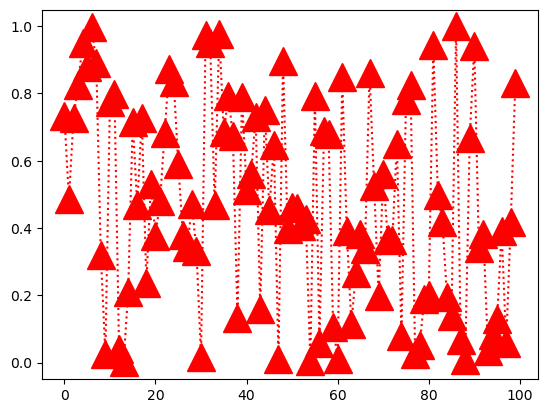

In [114]:
df['A'].plot(ls = ':', color='red', marker='^', markersize=20) # linestyle = ls

<Axes: >

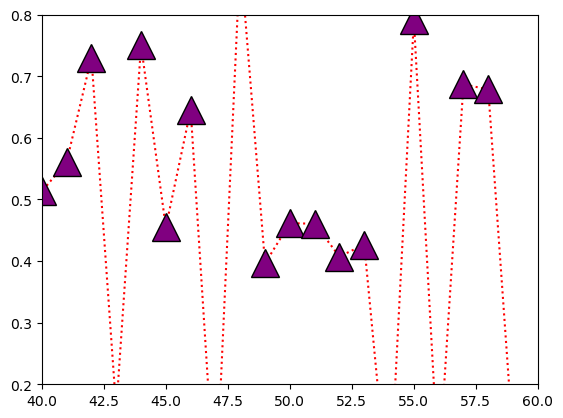

In [119]:
df['A'].plot(ls = ':', color='red', marker='^', markersize=20, xlim=[40,60], markeredgecolor='black', markerfacecolor='purple',ylim=[0.2,0.8]) # linestyle = ls

<Axes: ylabel='Frequency'>

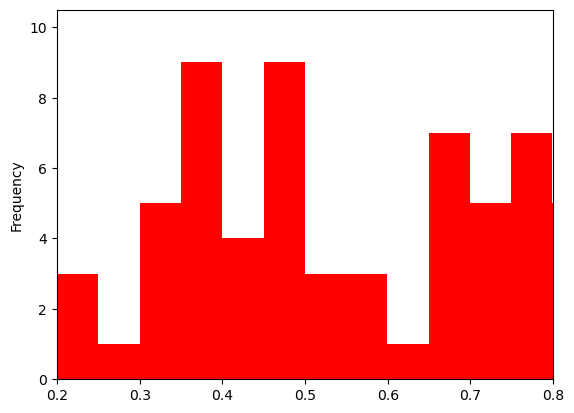

In [125]:
df['A'].plot.hist(bins=20, color='red', xlim=[0.2,0.8])

In [128]:
df2 = pd.DataFrame(np.random.randn(100,2))
df2

,0,1
0,2.004863,-0.833265
1,1.644149,-0.581601
2,-0.024720,0.944955
3,-0.226647,1.128340
4,0.033048,-0.550964
...,...,...
95,-0.746755,1.203247
96,0.096813,0.801851
97,-0.714906,-1.309095
98,1.180776,1.399684


<Axes: ylabel='Frequency'>

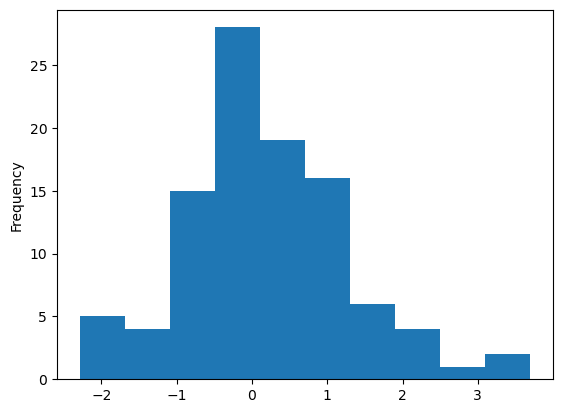

In [129]:
df2[0].plot.hist()

<Axes: ylabel='Frequency'>

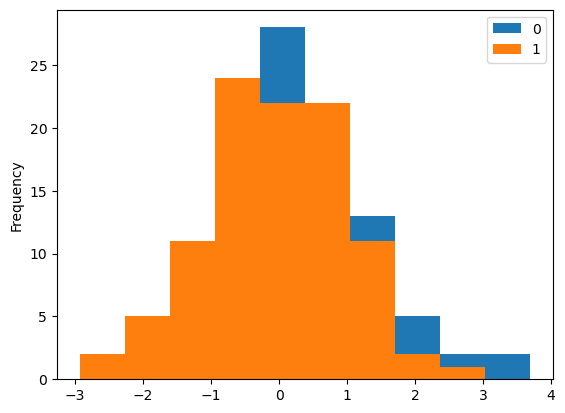

In [130]:
df2.plot.hist()

<Axes: >

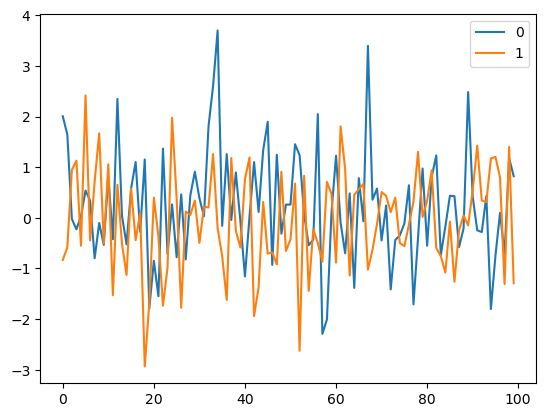

In [131]:
df2.plot()

<Axes: >

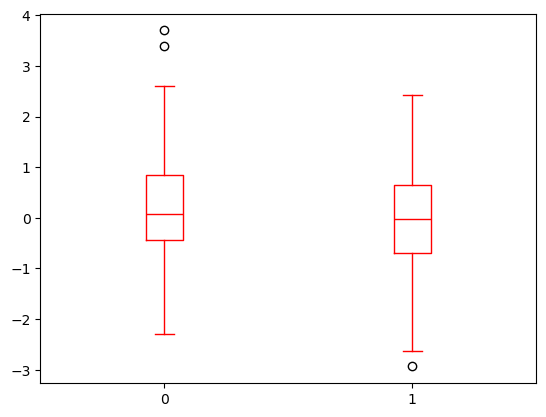

In [133]:
df2.plot.box(color='red')

<Axes: >

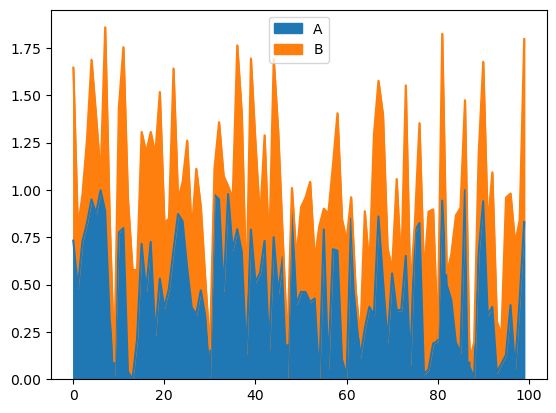

In [135]:
df.plot.area() # area curves requires all values to be positive or negative